<a href="https://colab.research.google.com/github/Surajkr1166/Bevarc-Construction-project/blob/main/Bvarc_Construction_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import some important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#upload the dataset from local drive
from google.colab import files
uploaded_data = files.upload()

Saving construction_estimates.csv to construction_estimates.csv


In [5]:
#read the data set
data = pd.read_csv('construction_estimates.csv')

In [6]:
data.head()

,Material_Cost,Labor_Cost,Profit_Rate,Discount_or_Markup,Policy_Reason,Total_Estimate
0,43985,12836,10,1095,Market conditions require competitive pricing ...,63598.10
1,45504,17873,15,-6426,Market conditions require competitive pricing ...,66457.55
2,33656,8401,25,9862,"The client is a repeat customer, deserving a l...",62433.25
3,36509,8523,20,8096,"The client is a repeat customer, deserving a l...",62134.40
4,37372,14123,30,-9598,Strategic importance of this client justifies ...,57345.50


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Material_Cost       1000 non-null   int64  
 1   Labor_Cost          1000 non-null   int64  
 2   Profit_Rate         1000 non-null   int64  
 3   Discount_or_Markup  1000 non-null   int64  
 4   Policy_Reason       1000 non-null   object 
 5   Total_Estimate      1000 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 47.0+ KB


**BASIC DATA CLEANING AND ANALYSIS**

In [16]:
#check summary statistics
summary_stats=data.describe()

In [14]:
#correlation matrix
correlation_matrix=data.corr(numeric_only=True)

In [12]:
# Identify potential outliers in costs
outliers_material = data['Material_Cost'][data['Material_Cost'] > data['Material_Cost'].quantile(0.95)]
outliers_labor = data['Labor_Cost'][data['Labor_Cost'] > data['Labor_Cost'].quantile(0.95)]


In [17]:
# Display key insights
print("Summary Statistics:\n", summary_stats)
print("\nCorrelation Matrix:\n", correlation_matrix)
print("\nTop 5 Material Cost Outliers:\n", outliers_material.head())
print("\nTop 5 Labor Cost Outliers:\n", outliers_labor.head())


Summary Statistics:
        Material_Cost    Labor_Cost  Profit_Rate  Discount_or_Markup  \
count     1000.00000   1000.000000  1000.000000         1000.000000   
mean     29908.74700  17566.307000    19.740000          -73.475000   
std      11200.10159   7225.096808     6.955629         5750.120642   
min      10038.00000   5067.000000    10.000000        -9987.000000   
25%      20528.00000  11462.500000    15.000000        -5102.250000   
50%      30023.50000  17591.500000    20.000000         -131.000000   
75%      39438.75000  23738.750000    25.000000         4980.000000   
max      49947.00000  29923.000000    30.000000         9979.000000   

       Total_Estimate  
count     1000.000000  
mean     56769.692700  
std      17465.481663  
min      13319.150000  
25%      44069.300000  
50%      57121.350000  
75%      69295.100000  
max     109165.400000  

Correlation Matrix:
                     Material_Cost  Labor_Cost  Profit_Rate  \
Material_Cost            1.000000    0.

**Create 2–3 visualizations**

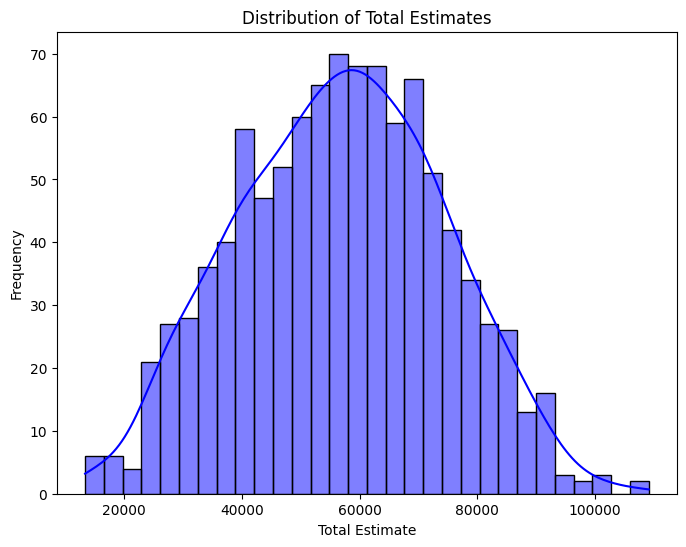

In [19]:
#Visualizations
# (a) Distribution of Total Estimates
plt.figure(figsize=(8, 6))
sns.histplot(data['Total_Estimate'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Estimates')
plt.xlabel('Total Estimate')
plt.ylabel('Frequency')
plt.show()

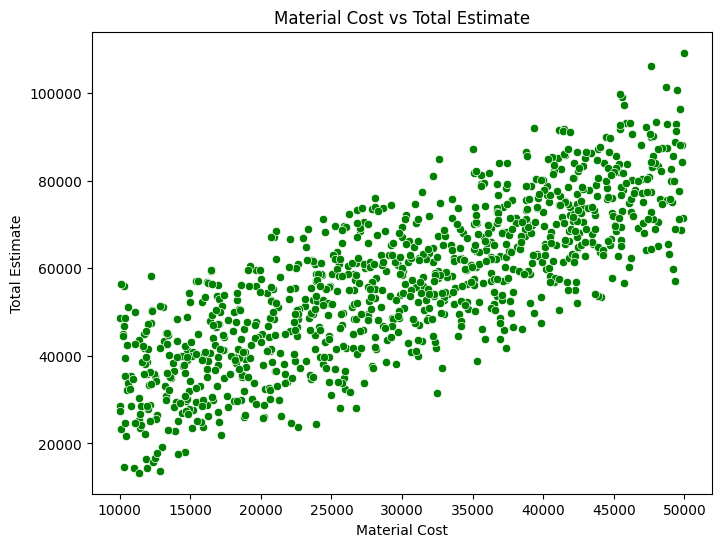

In [20]:
# (b) Relationship between Material Cost and Total Estimate
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Material_Cost'], y=data['Total_Estimate'], color='green')
plt.title('Material Cost vs Total Estimate')
plt.xlabel('Material Cost')
plt.ylabel('Total Estimate')
plt.show()


<ipython-input-21-82cc93d49867>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Profit_Rate'], y=data['Total_Estimate'], palette='Set2')


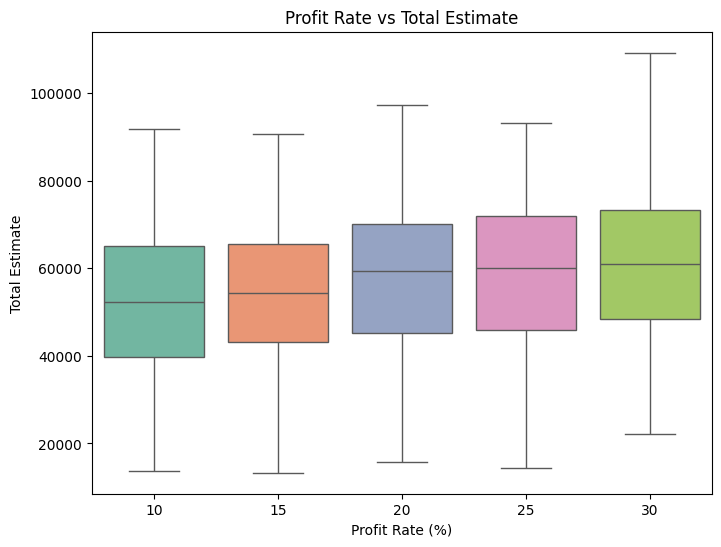

In [21]:
# (c) Impact of Profit Rate on Total Estimate
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Profit_Rate'], y=data['Total_Estimate'], palette='Set2')
plt.title('Profit Rate vs Total Estimate')
plt.xlabel('Profit Rate (%)')
plt.ylabel('Total Estimate')
plt.show()

**Suggest Improvements for Cost Optimization**

In [22]:
 # Identify clients receiving discounts
discounted_clients = data[data['Discount_or_Markup'] < 0]

# Calculate the average discount
average_discount = discounted_clients['Discount_or_Markup'].mean()

print("\nInsight: Average Discount Applied: {:.2f}".format(average_discount))
print("Suggestion: Minimize discounts for less strategic clients to improve profitability.")


Insight: Average Discount Applied: -5002.80
Suggestion: Minimize discounts for less strategic clients to improve profitability.
